# Clustering

## Definition

Finding subgroups (clusters) in a dataset that group instances that are very similar to each other

## Distances in unsupervised learning
[Reference](https://machinelearningmastery.com/distance-measures-for-machine-learning/)

### Hamming distance
    
- Calculates the distance between 2 binary vectors / binary strings / bitstrings
- Useful when you one-hot encode categorical columns of data (therefore an interesting measure for heavily categorical input features)
- Examples of usage: character recognition, fuzzy matching of names

- Formula: `sum for i to N abs(v1[i] - v2[i])`


### Euclidean distane

- Calculates the distance between two real-valued vectors
- Useful when calculating the distance between two floating point or integer values
- Columns should be scaled (normalized or standardized) in roder to achieve that
- Square root of the sum of the squarred differences between two vecotrs

- Formula for 2 elements: `sqrt( (x1 - x2)^2 + (y1-y1)^ 2 )`

- Standard formula: `sqrt( sum for i to N (v1[i] - v2[i])^2 )`
- Shortcut for big N: `sum for i to N (v1[i] - v2[i])^2`

- Related to the **L2 vector norm**, equivalent to `MSE`, `RMSE`

### Manhattan distance

- AkA Taxicab distance - distance between two real-valued vectors
- Useful to vectors that describe objects on a uniform grid (chessboard, city blocks)
- Shortest path that a taxicab would take between city blocks

- Useful for datasets with Ordinal Encoded data: an integer feature space

- Formula for 2 elements: `sum ( |x[1] - x[2]| + |y[1] - y[2]| )`

- Formula: ManhattanDistance = `sum for i to N sum |v1[i] – v2[i]|`

- Related to the **L1 vector norm** and equivalent to `MAE`

### Minkowski distance

- Generalization p=1 implies Manhattan, p=2 implies Euclidean

- Minkowski distance: `(sum for i to N (abs(v1[i] –v2[i]))^p)^(1/p)`

## K-means clustering



### How it works
1. Randomly assign a number form 1 to K for each of the observations
    - Initial assignments for the observations
2. Iterate until cluster assignments stop changing
    - For each of the K clusters, compute cluster centroid
    - Assign each observation to the closest centroid (Euclidean distance)
### How to find the right # of clusters (K)
1. Elbow Curve Method
2. Coefficients: Silhouette, Calinski-Harasbasz, Davies Bouldin



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./inputs/bank_marketing_dataset.csv")

In [3]:
df.shape

(41188, 21)

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


### Random data exploring - ignore

Text(0.5, 1.0, 'Age distribution of customers')

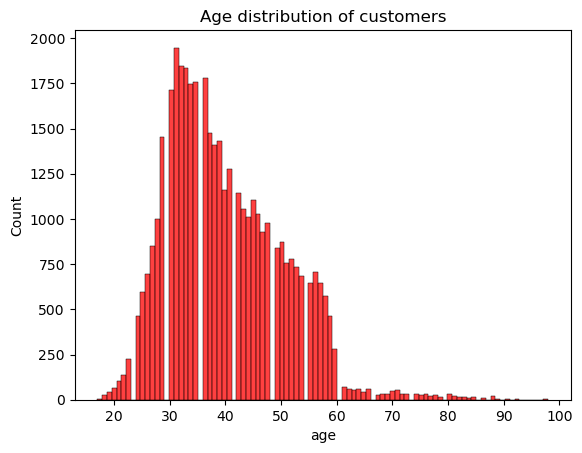

In [15]:
ax = sns.histplot(df, x='age', color='red')
ax.set_title("Age distribution of customers")

Text(0.5, 1.0, 'Age distribution of customers vs their loan status')

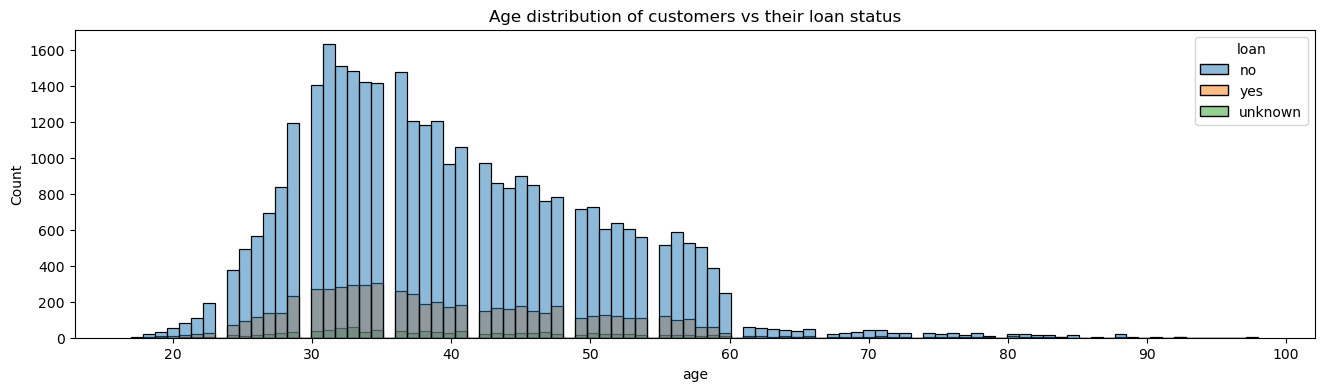

In [17]:
_, ax = plt.subplots(figsize=(16,4))
sns.histplot(df, x='age', hue='loan', ax=ax)
ax.set_title("Age distribution of customers vs their loan status")

Text(0.5, 1.0, 'Marital Status os customers')

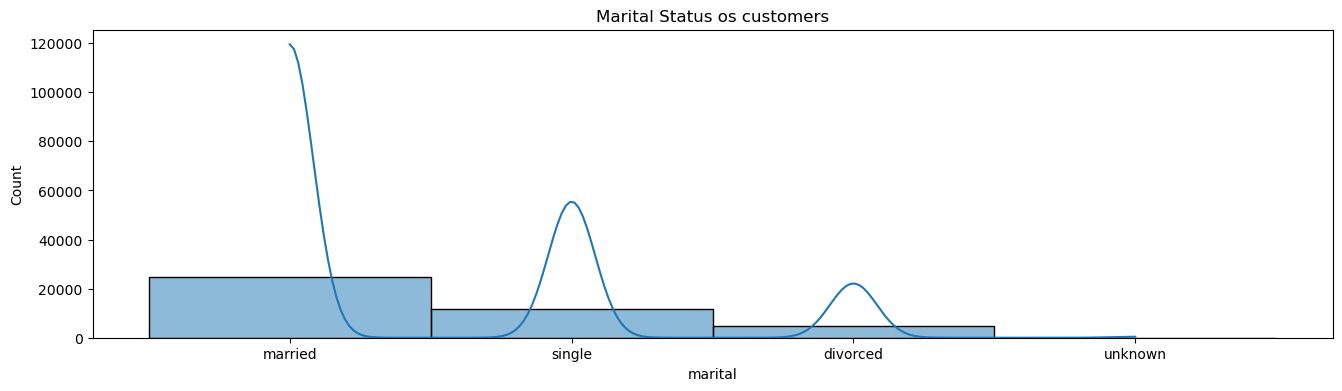

In [19]:
_, ax = plt.subplots(figsize=(16,4))
sns.histplot(df, x='marital', kde=True, ax=ax)
ax.set_title("Marital Status os customers")

Text(0.5, 1.0, 'Distribution of days since last campaign')

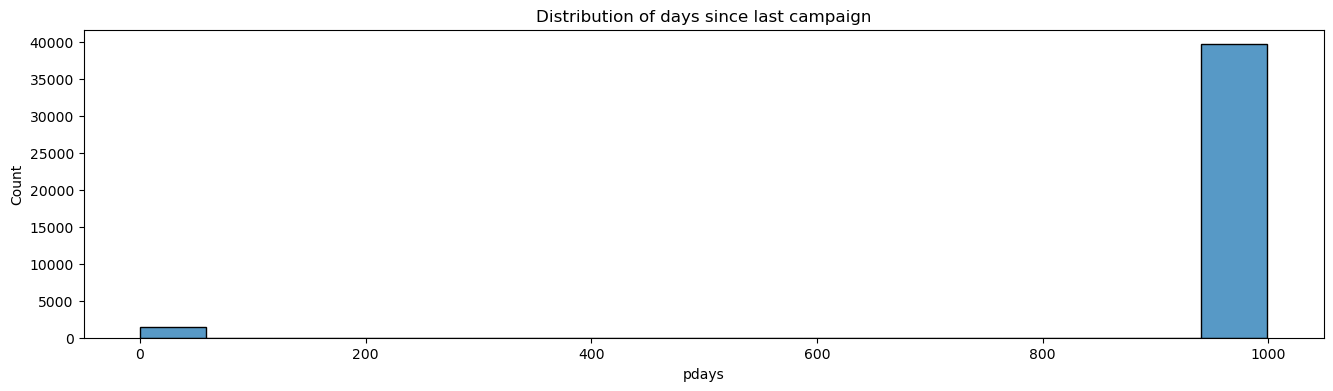

In [20]:
_, ax = plt.subplots(figsize=(16,4))
sns.histplot(df, x='pdays', ax=ax)
ax.set_title("Distribution of days since last campaign")

In [22]:
df['pdays'].value_counts().head()

999    39673
3        439
6        412
4        118
9         64
Name: pdays, dtype: int64

Text(0.5, 1.0, 'Distribution of days since last campaign')

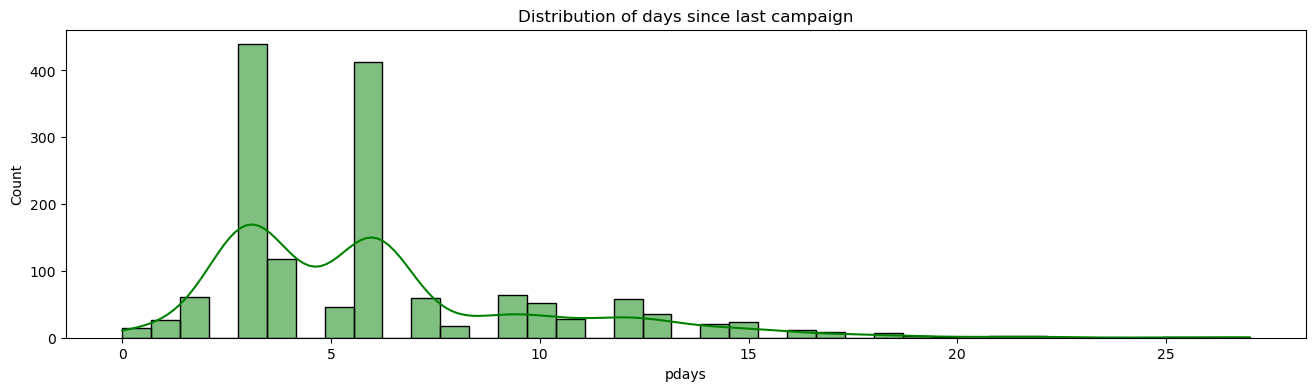

In [23]:
_, ax = plt.subplots(figsize=(16,4))
sns.histplot(df[df.pdays != 999], x='pdays', kde=True, ax=ax, color='green')
ax.set_title("Distribution of days since last campaign")

(0.0, 1000.0)

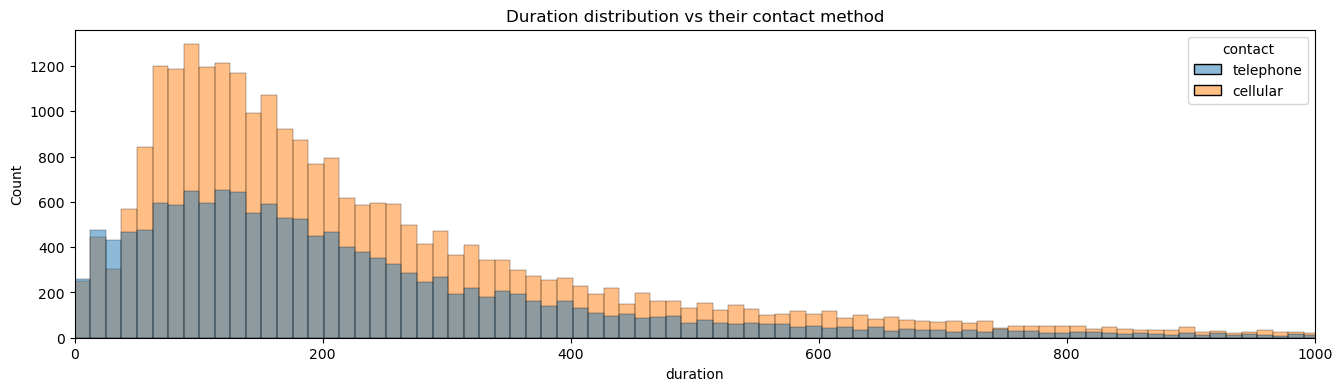

In [25]:
_, ax = plt.subplots(figsize=(16,4))
sns.histplot(df, x='duration', hue='contact', ax=ax)
ax.set_title("Duration distribution vs their contact method")
ax.set_xlim(0,1000)

### Get your hands dirty

In [28]:
# let's first try one hot encoding... useful for the vast majority of categorical features

df_dummies = pd.get_dummies(df)

In [29]:
df_dummies.shape

(41188, 65)

In [30]:
from sklearn.preprocessing import StandardScaler

In [34]:
df_scaled = StandardScaler().fit_transform(df_dummies)

In [35]:
df_scaled

array([[ 1.53303429,  0.01047142, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 1.62899323, -0.42150051, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [-0.29018564, -0.12451981, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       ...,
       [ 1.53303429, -0.26722482, -0.20490853, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 0.38152696,  0.70856893, -0.56592197, ..., -0.1857    ,
        -2.80655022,  2.80655022],
       [ 3.26029527, -0.07438021,  0.15610492, ..., -0.1857    ,
         0.35630932, -0.35630932]])

In [37]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [38]:
# model
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df_scaled)

KMeans(n_clusters=2, random_state=0)

In [39]:
cluster_labels = kmeans.predict(df_scaled)

In [41]:
pd.Series(cluster_labels).value_counts()

0    26869
1    14319
dtype: int64

In [42]:
df_dummies['Cluster'] = cluster_labels

## Correlation with each feature we assigned

Text(0.5, 1.0, 'Correlation between features and Clusters')

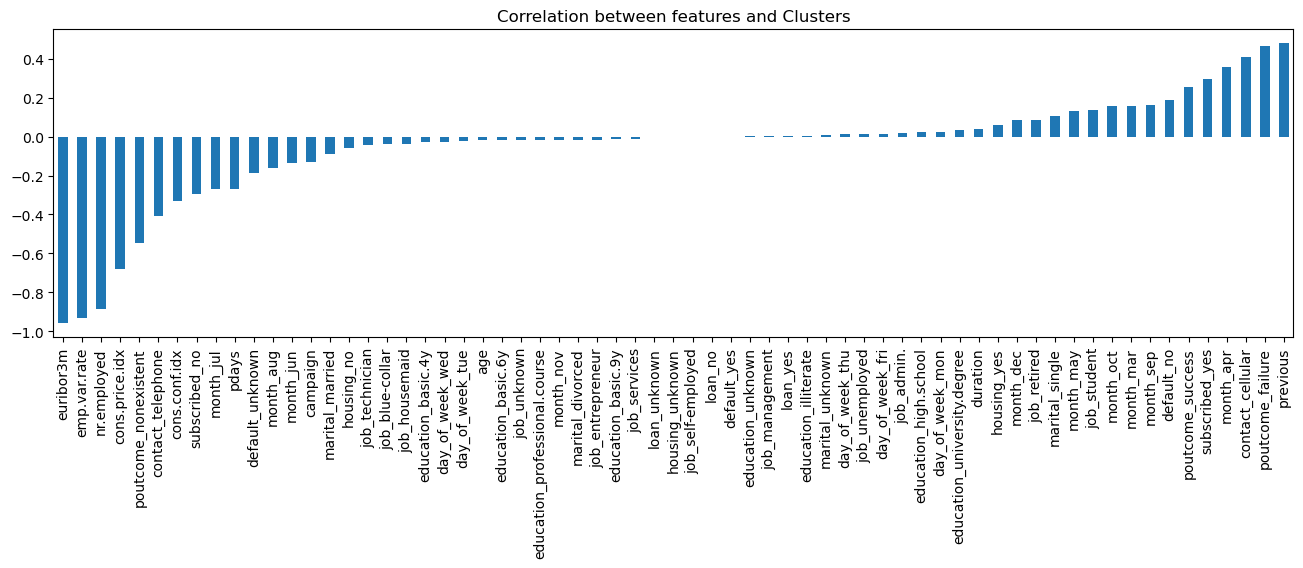

In [46]:
_, ax = plt.subplots(figsize=(16,4))

df_dummies.corr()["Cluster"].iloc[:-1].sort_values().plot(kind='bar', ax=ax)
ax.set_title("Correlation between features and Clusters")

### Find optimal K

1. Elbow method

In [58]:
from sklearn.metrics import silhouette_score

In [59]:
ssd = []
sil_euclidean = []
sil_manhattan = []

for k in range (2,10):
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(df_dummies)
    
    labels = model.predict(df_dummies)
    sil_euc = silhouette_score(df_dummies, labels, metric='euclidean',
                               sample_size=4000,random_state=0)
    sil_man = silhouette_score(df_dummies, labels, metric='manhattan',
                               sample_size=4000,random_state=0)
    
    ssd.append(model.inertia_)
    sil_euclidean.append(sil_euc)
    sil_manhattan.append(sil_man)

In [53]:
ssd

[2735461312.1918206,
 1321035050.29542,
 851056307.0117946,
 642597051.5253341,
 531577270.36776245,
 440295538.43687224,
 376952898.31534815,
 326257742.72391546]

In [60]:
sil_euclidean

[0.6379060772821817,
 0.68982111679596,
 0.5608653096170444,
 0.47533030600119086,
 0.44481610648561,
 0.44908097424331545,
 0.4409943646018801,
 0.43588908451182645]

In [61]:
sil_manhattan

[0.5976298727529932,
 0.6393205695482804,
 0.504811844153565,
 0.4266447335586645,
 0.3997458942319297,
 0.42645252331367894,
 0.40564453822821506,
 0.3993199973957571]

Text(0, 0.5, 'Inertia')

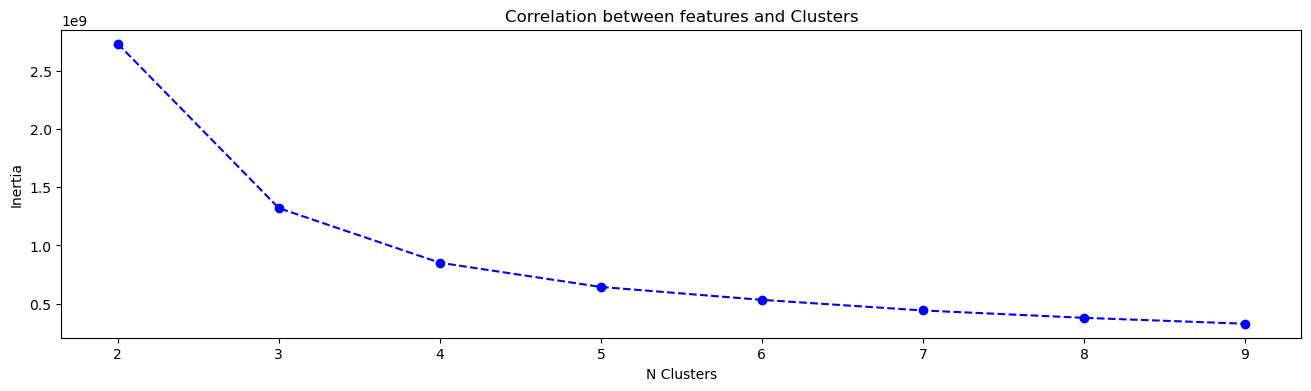

In [62]:
_, ax = plt.subplots(figsize=(16,4))

ax.plot(range(2,10), ssd, 'o--', color='blue')
ax.set_title("Correlation between features and Clusters")
ax.set_xlabel("N Clusters")
ax.set_ylabel("Inertia")

In [63]:
pd.Series(ssd).diff()

0             NaN
1   -1.414426e+09
2   -4.699787e+08
3   -2.084593e+08
4   -1.110198e+08
5   -9.128173e+07
6   -6.334264e+07
7   -5.069516e+07
dtype: float64

Max diff value in ssd happens for K=4
- Still probably suboptimal as most features are cateogircal and K-means uses euclidean distance

2. Silhouette

- A best in class clustering algorithm will yield a silhouette score ~1.0
- Euclidean distance performs better in any # of clusters
- N = 3 returns the best clustering of customers

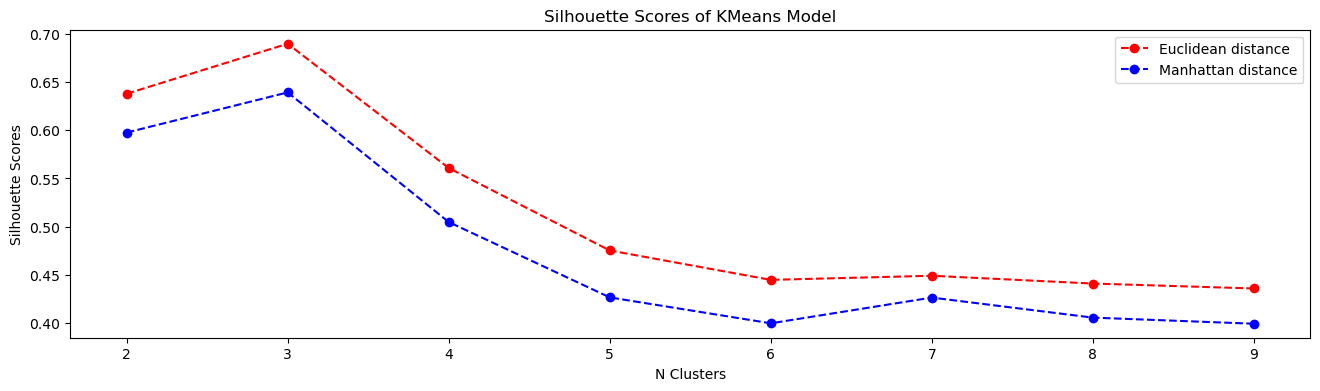

In [69]:
_, ax = plt.subplots(figsize=(16,4))

ax.plot(range(2,10), sil_euclidean, 'o--', color='red', label='Euclidean distance')
ax.plot(range(2,10), sil_manhattan, 'o--', color='blue', label='Manhattan distance')
ax.set_title("Silhouette Scores of KMeans Model")
ax.set_xlabel("N Clusters")
ax.set_ylabel("Silhouette Scores")
ax.legend()